In [71]:
#loading libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns


In [32]:
# Use this if it's a real Excel sheet
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [33]:
#check missing value
df.isnull().sum()


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [34]:
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

In [35]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train, y_test= train_test_split(X,y,test_size=0.2, random_state=42)

In [36]:
from sklearn.linear_model import LogisticRegression  # 1. No parentheses here
model = LogisticRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
y_predict

C:\Users\narra\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,

In [37]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_predict)

print("Accuracy of Logistic Regression model is:", accuracy)

Accuracy of Logistic Regression model is: 0.795


In [38]:
#check loss function
from sklearn.metrics import log_loss
logloss= log_loss(y_test,y_predict)
print("Log loss of Logistic Regression model is:",logloss)

Log loss of Logistic Regression model is: 7.388948944769016


In [39]:
#combined actual vs predicted
comparsion = pd.DataFrame({"actual:":y_test, "predicted":y_predict})
comparsion

,actual:,predicted
1860,1,1
353,0,0
1333,1,1
905,1,1
1289,1,1
...,...,...
965,0,1
1284,0,0
1739,0,0
261,1,1


In [40]:
# findthe confusion matrix
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, y_predict)
cm

array([[232,  21],
       [ 61,  86]])

C:\Users\narra\AppData\Local\Temp\ipykernel_20440\1693138181.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Outcome", data=df , palette='bwr', color='red')


<Axes: xlabel='Outcome', ylabel='count'>

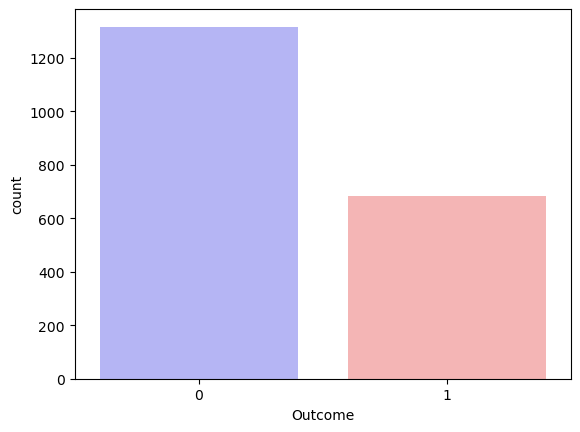

In [41]:
#EDA
sns.countplot(x="Outcome", data=df , palette='bwr', color='red')

In [42]:
import joblib
joblib.dump(model,'logistic_regression_model.pkl')
print("Model saved sucessfully as 'logistic_regression_model.pkl'")

Model saved sucessfully as 'logistic_regression_model.pkl'


In [43]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_predict)

print("Accuracy of Logistic Regression model is:", accuracy)
#check loss function
from sklearn.metrics import log_loss
logloss= log_loss(y_test,y_predict)
print("Log loss of Logistic Regression model is:",logloss)
# findthe confusion matrix
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, y_predict)
cm

Accuracy of Logistic Regression model is: 0.795
Log loss of Logistic Regression model is: 7.388948944769016


array([[232,  21],
       [ 61,  86]])

In [44]:
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print("Train Score:", train_score)
print("Test Score:", test_score)


Train Score: 0.7725
Test Score: 0.795


In [45]:
# correlation matrix
corr_matrix = df.corr()
corr_matrix


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.120405,0.149672,-0.063375,-0.076600,0.019475,-0.025453,0.539457,0.224437
Glucose,0.120405,1.000000,0.138044,0.062368,0.320371,0.226864,0.123243,0.254496,0.458421
BloodPressure,0.149672,0.138044,1.000000,0.198800,0.087384,0.281545,0.051331,0.238375,0.075958
SkinThickness,-0.063375,0.062368,0.198800,1.000000,0.448859,0.393760,0.178299,-0.111034,0.076040
Insulin,-0.076600,0.320371,0.087384,0.448859,1.000000,0.223012,0.192719,-0.085879,0.120924
BMI,0.019475,0.226864,0.281545,0.393760,0.223012,1.000000,0.125719,0.038987,0.276726
DiabetesPedigreeFunction,-0.025453,0.123243,0.051331,0.178299,0.192719,0.125719,1.000000,0.026569,0.155459
Age,0.539457,0.254496,0.238375,-0.111034,-0.085879,0.038987,0.026569,1.000000,0.236509
Outcome,0.224437,0.458421,0.075958,0.076040,0.120924,0.276726,0.155459,0.236509,1.000000


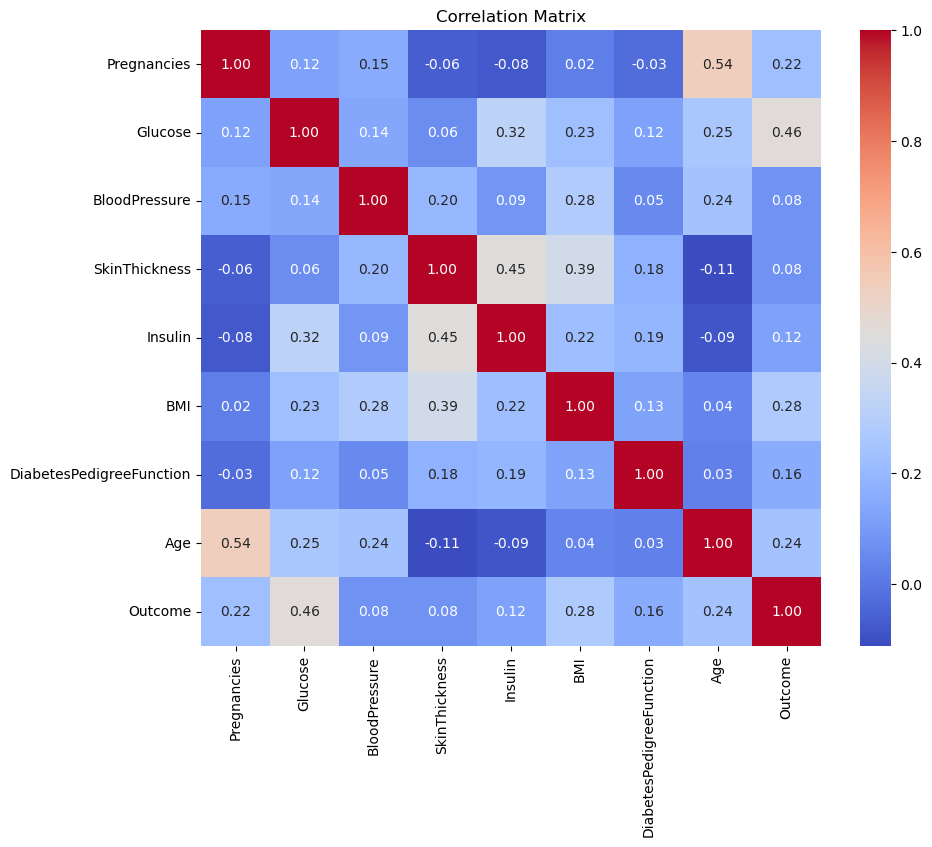

In [49]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

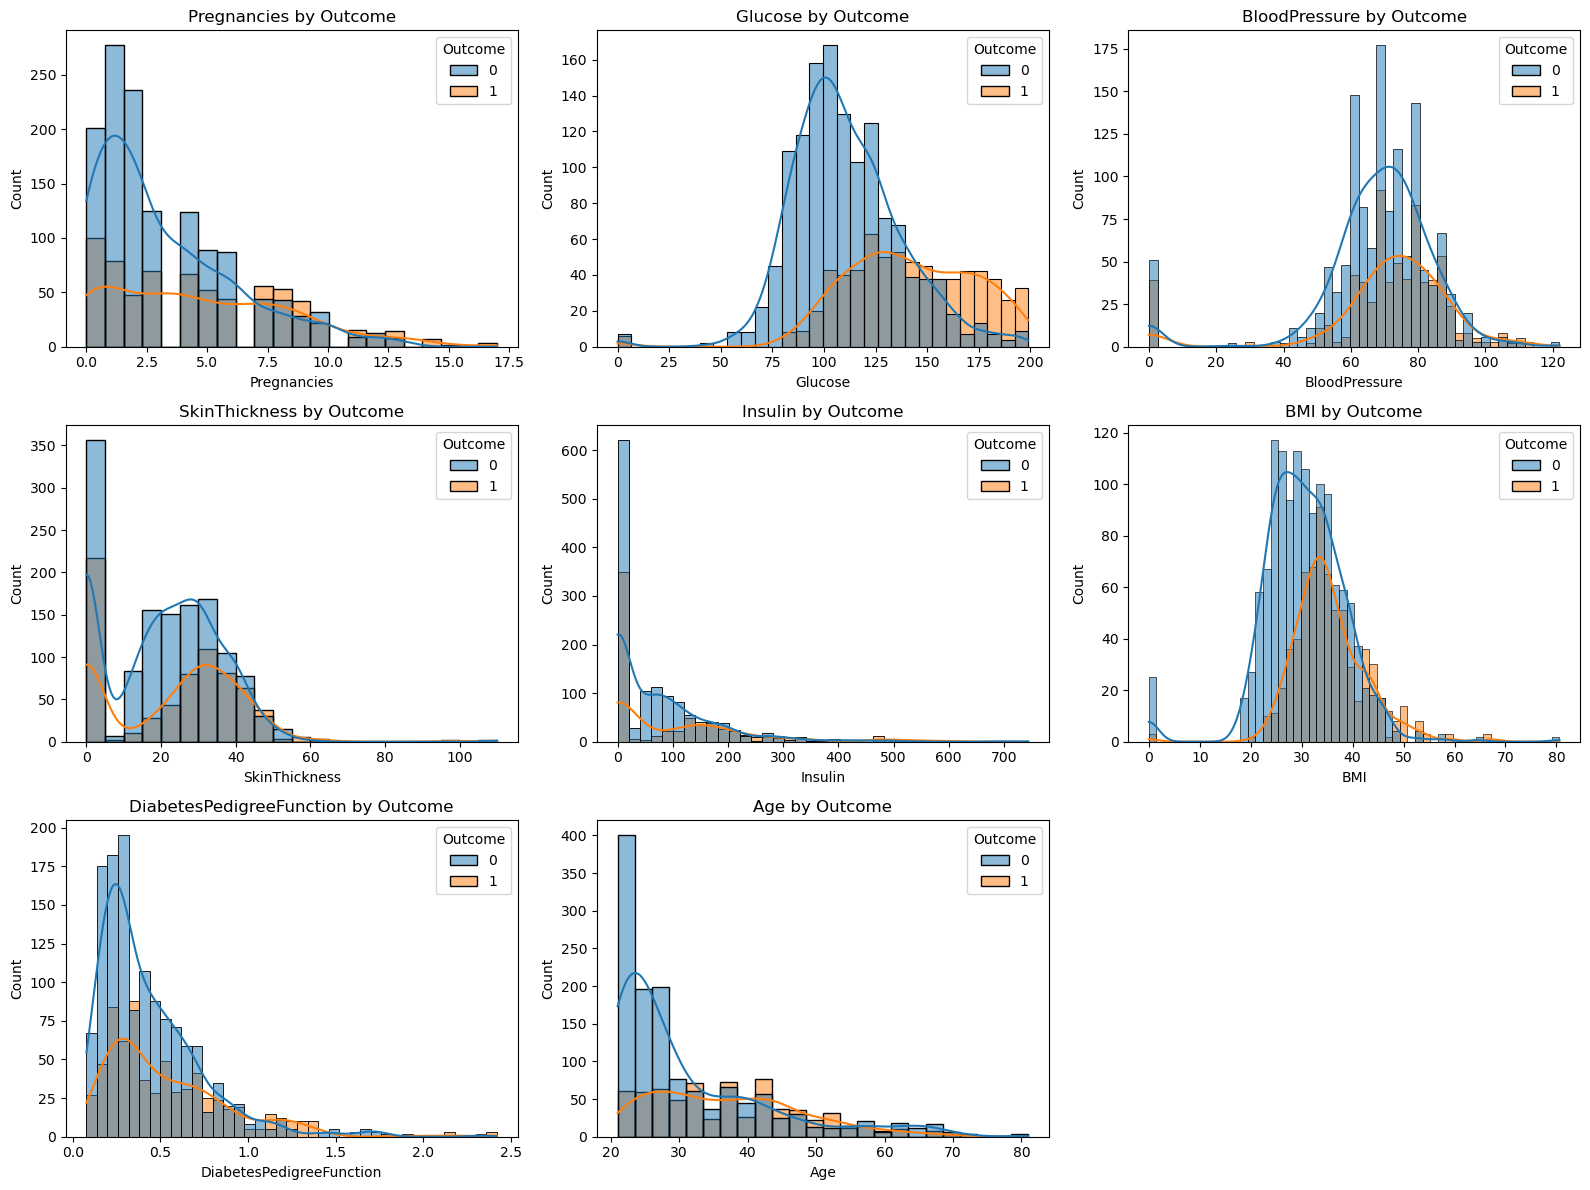

In [50]:
plt.figure(figsize=(16, 12))

for i, col in enumerate(df.columns[:-1], 1):
    plt.subplot(3, 3, i)
    sns.histplot(data=df, x=col, hue="Outcome", kde=True)
    plt.title(f"{col} by Outcome")

plt.tight_layout()
plt.show()


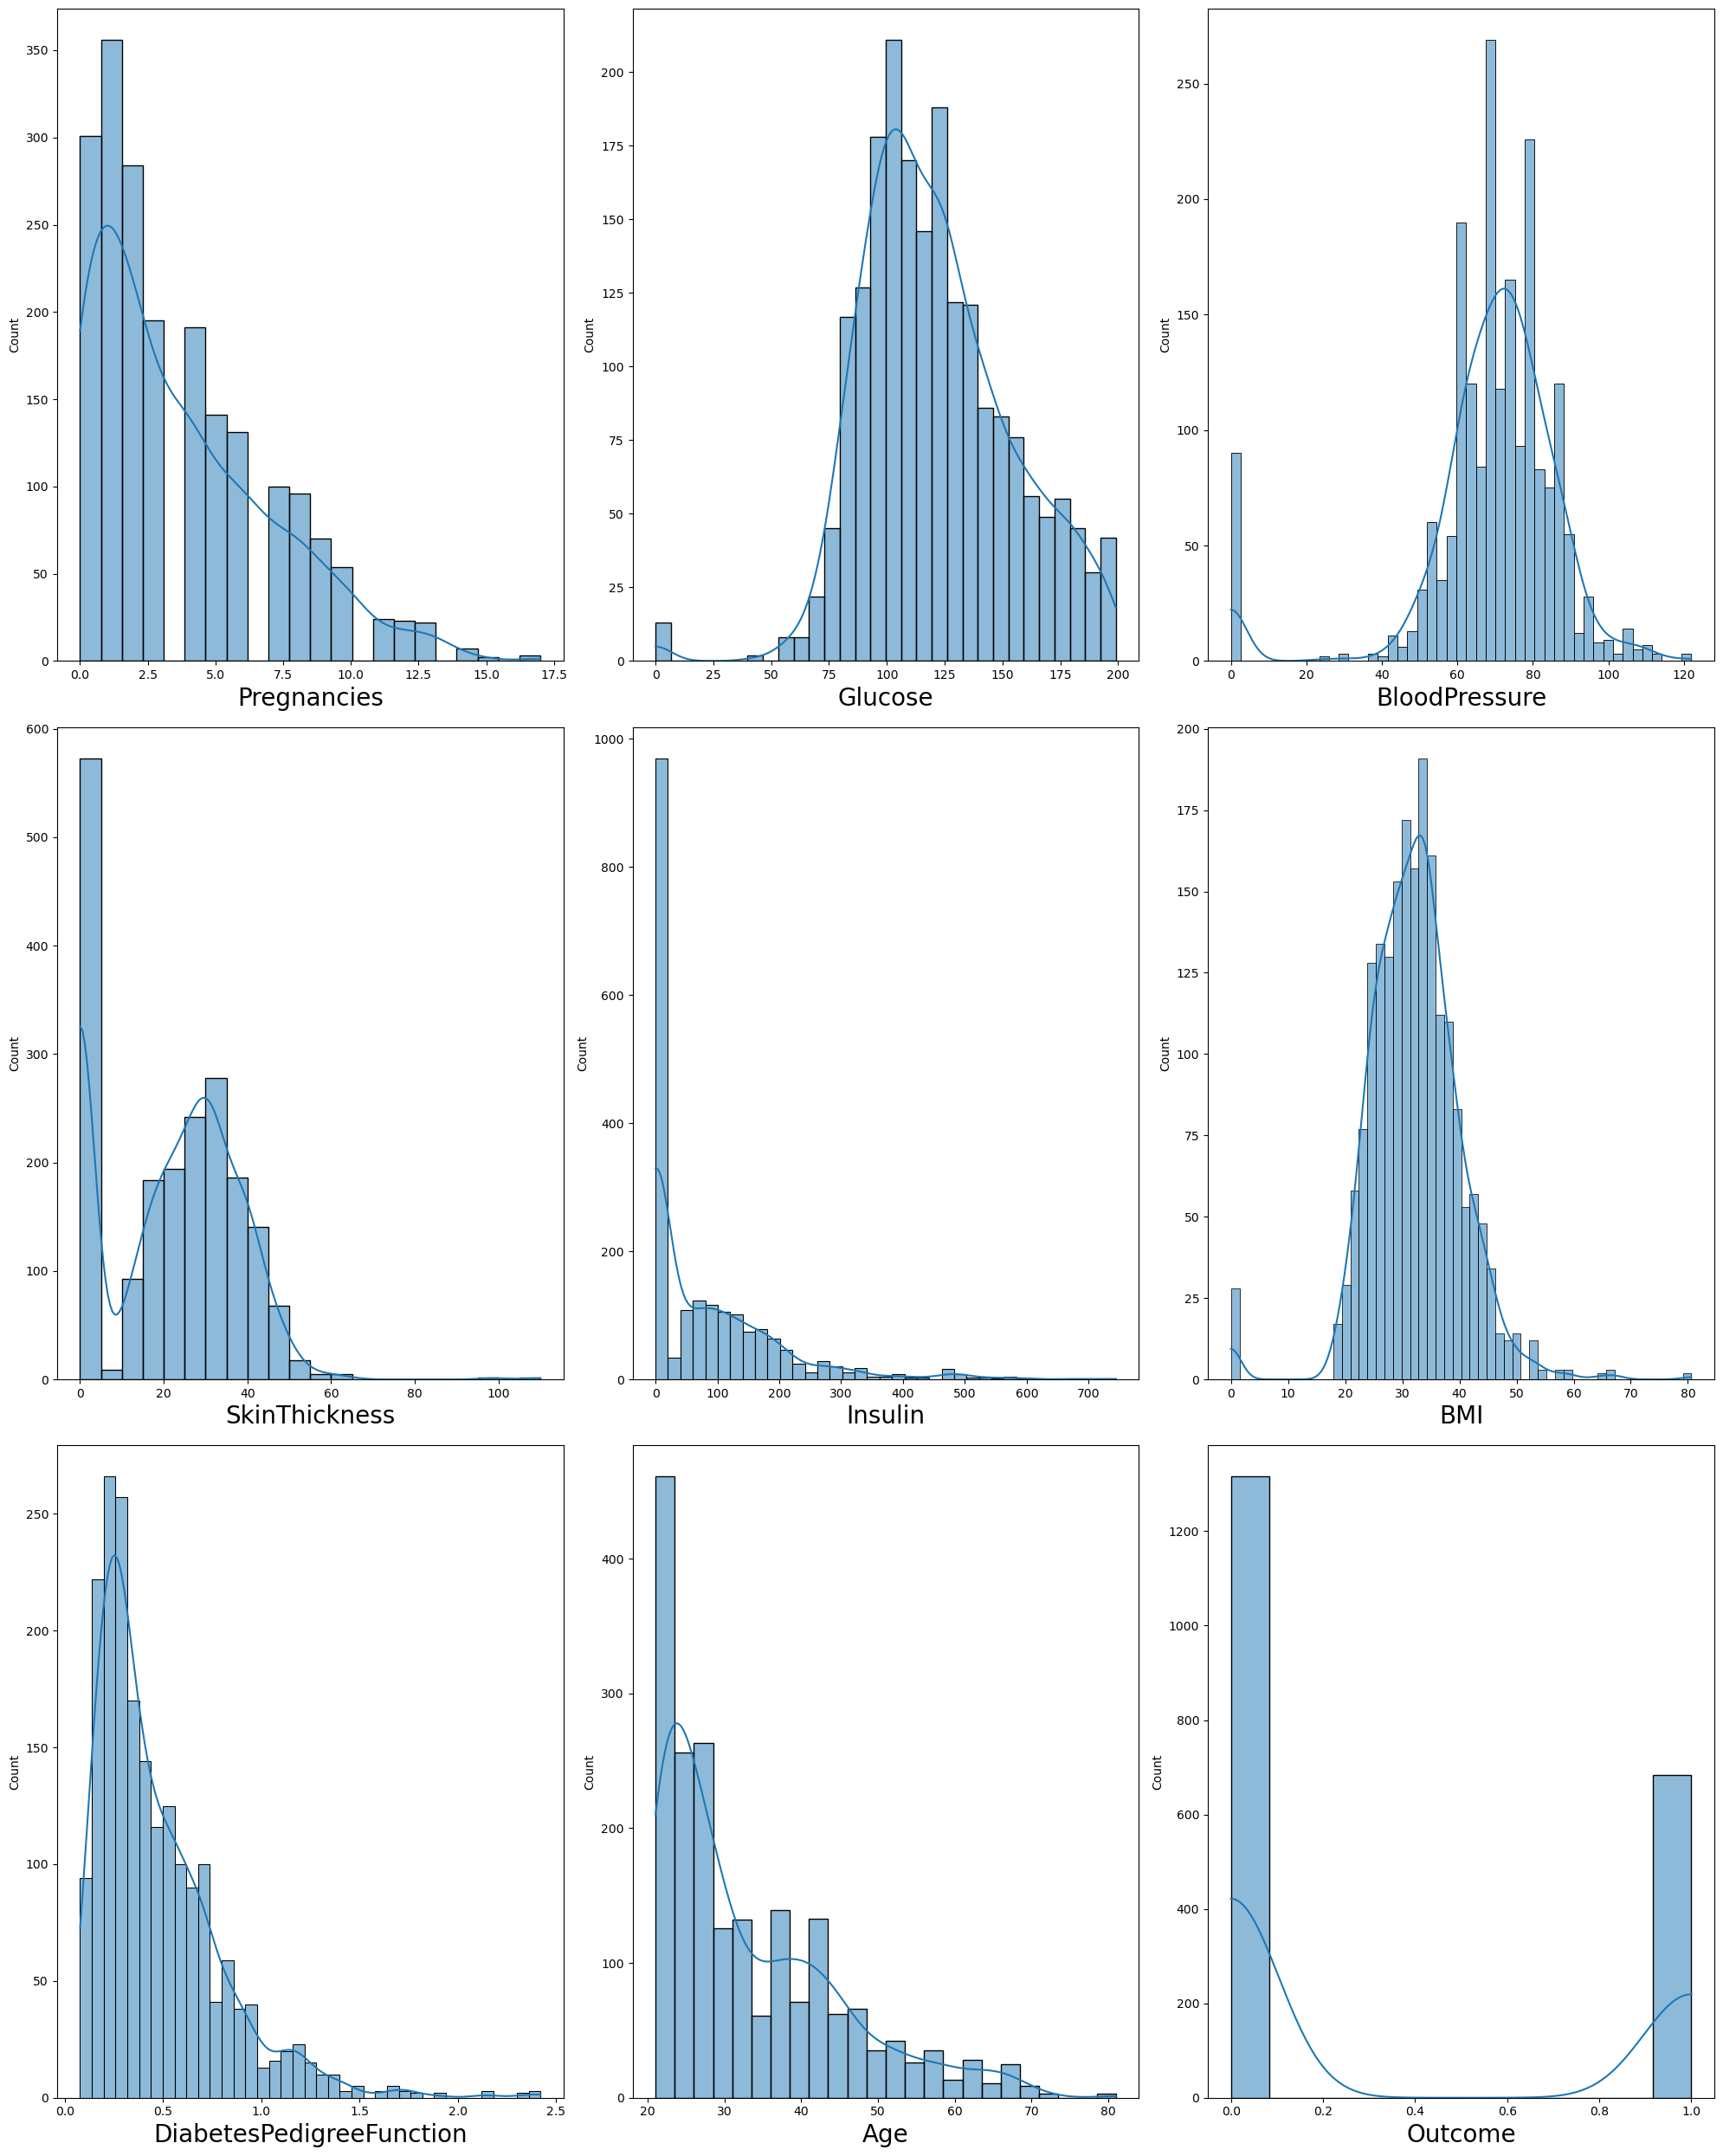

In [51]:
plt.figure(figsize=(20, 25), facecolor='white')
plotnumber = 1

for column in df.columns:
    if plotnumber <= 9:   # total columns = 9
        plt.subplot(3, 3, plotnumber)
        sns.histplot(df[column], kde=True)
        plt.xlabel(column, fontsize=20)
    plotnumber += 1

plt.tight_layout()
plt.show()

In [52]:
df['BMI'] = df['BMI'].replace(0, df['BMI'].median())
df['BloodPressure'] = df['BloodPressure'].replace(0, df['BloodPressure'].median())
df['Insulin'] = df['Insulin'].replace(0, df['Insulin'].median())
df['SkinThickness'] = df['SkinThickness'].replace(0, df['SkinThickness'].median())

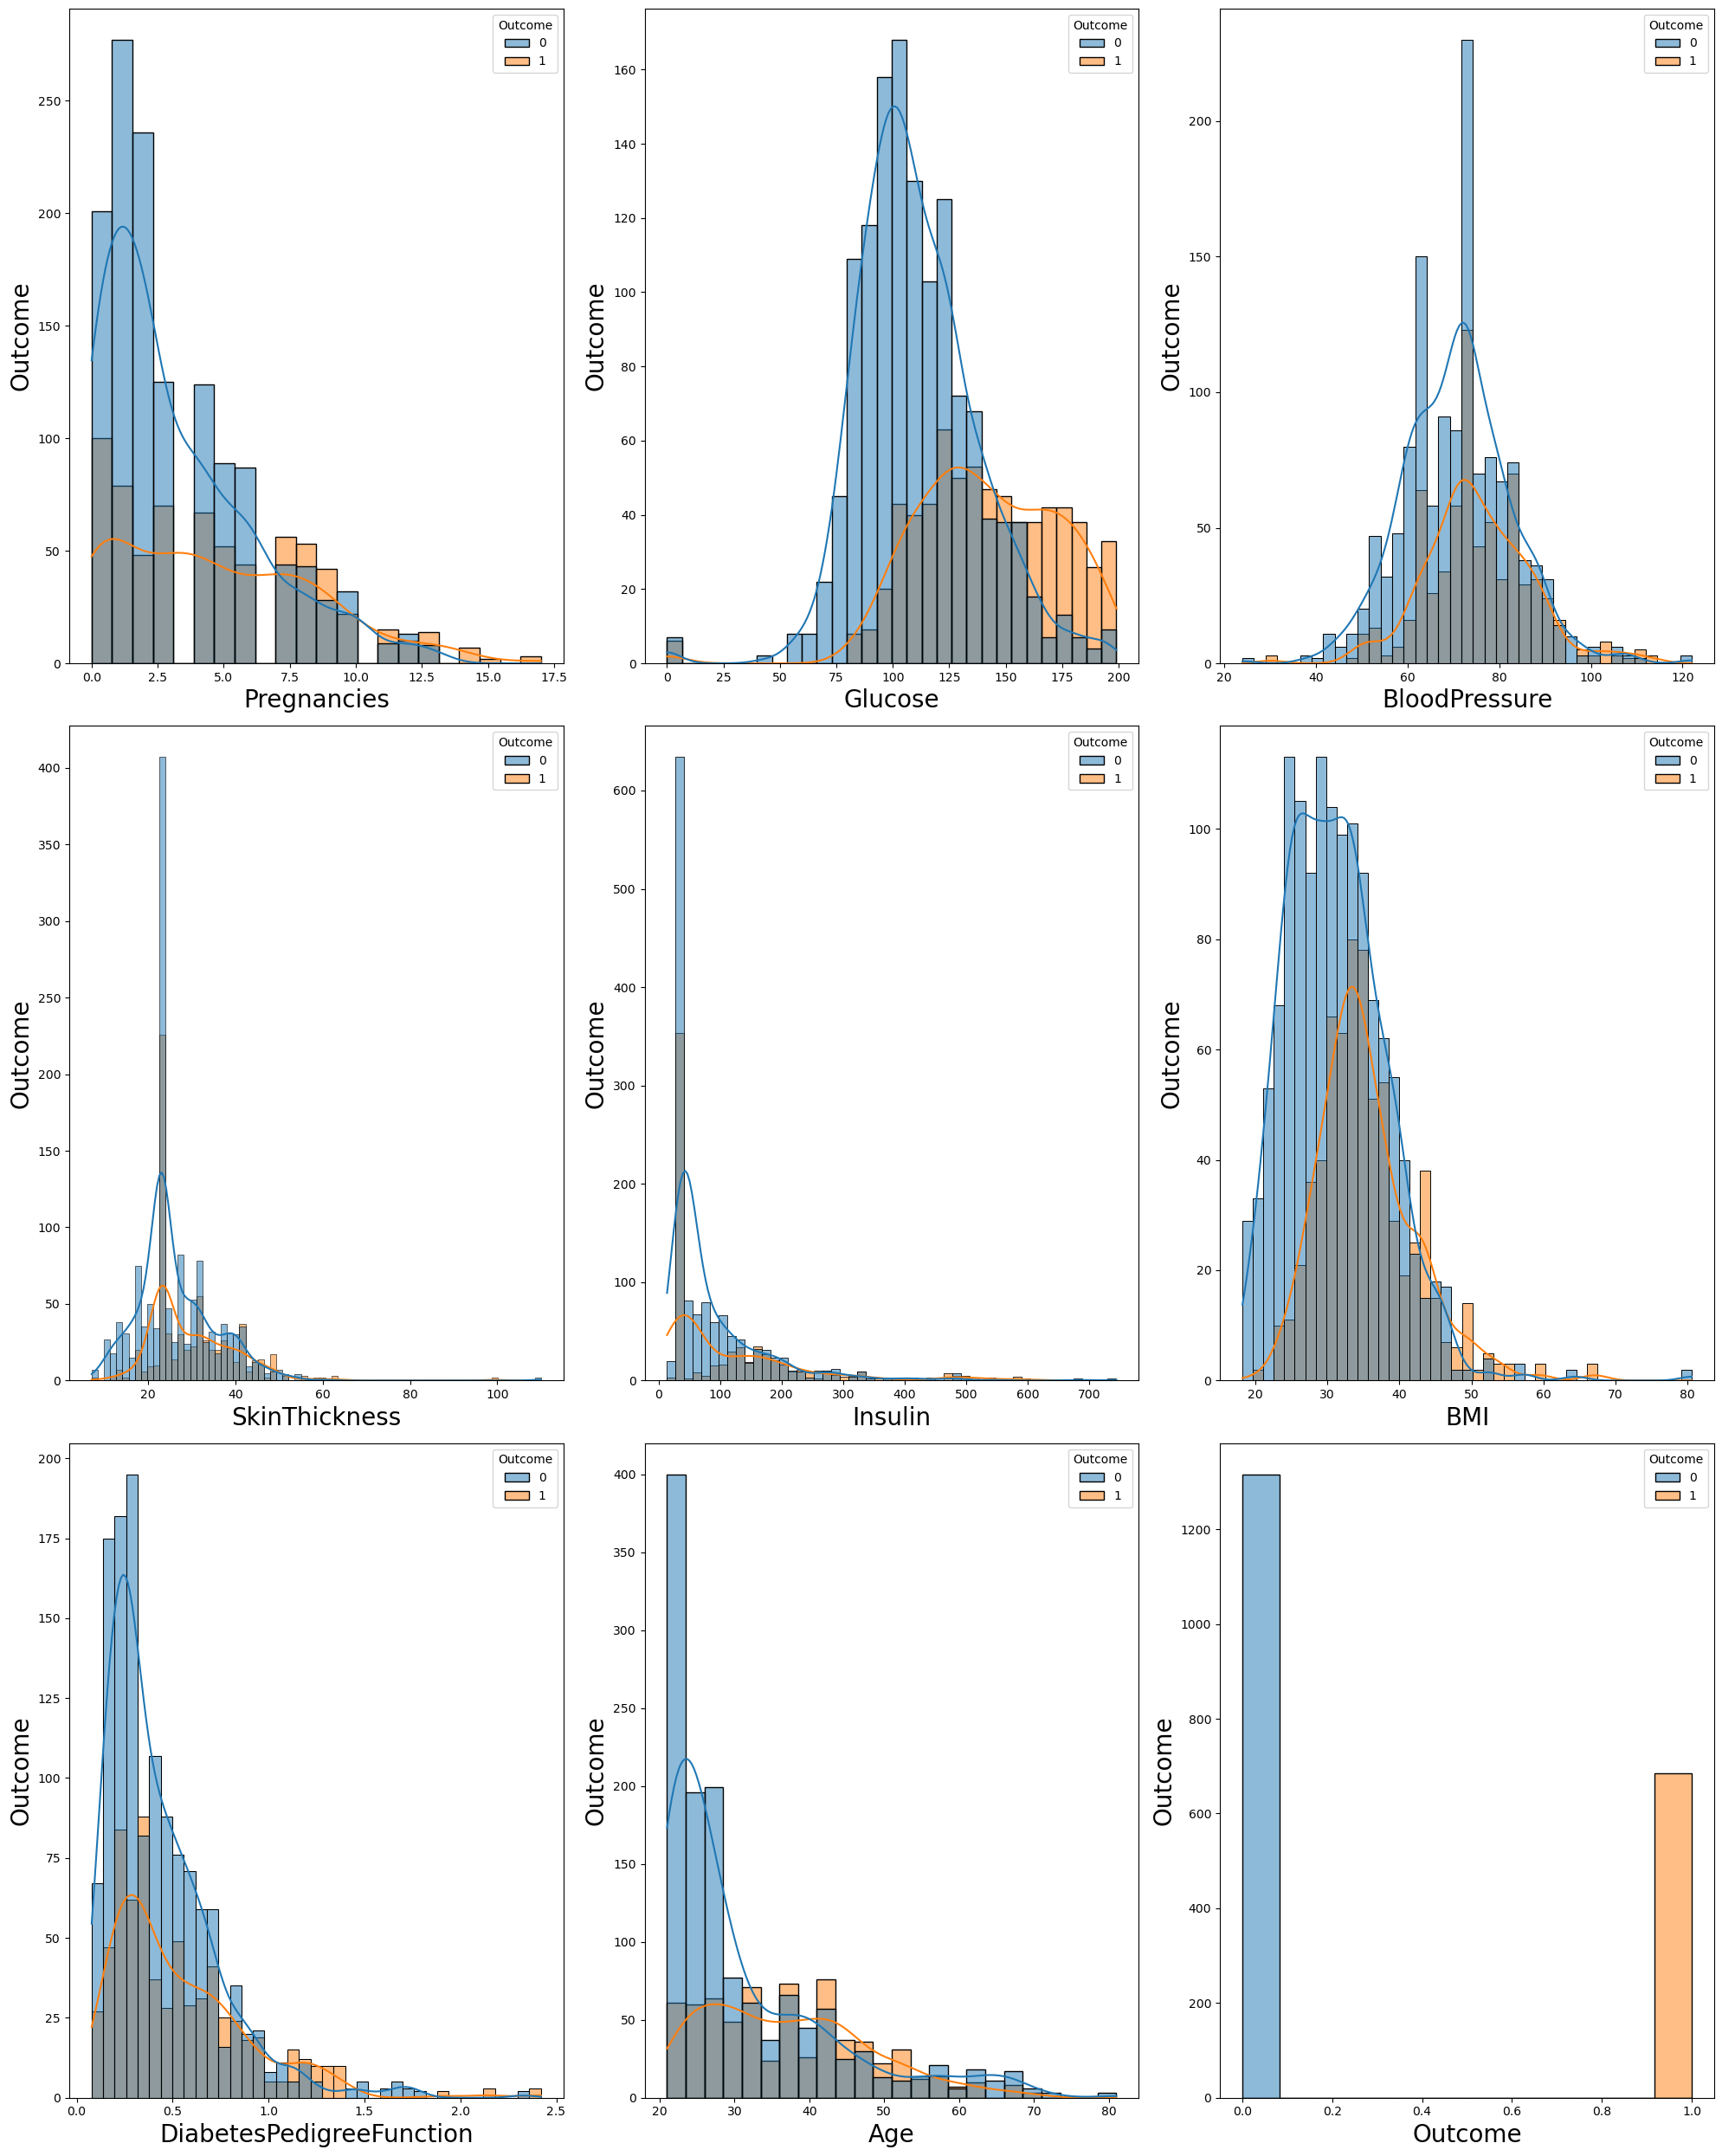

In [53]:
plt.figure(figsize=(20, 25), facecolor='white')
plotnumber = 1

for column in df.columns:
    if plotnumber <= 9:
        plt.subplot(3, 3, plotnumber)
        sns.histplot(x=df[column], hue=df['Outcome'], kde=True)
        plt.xlabel(column, fontsize=20)
        plt.ylabel('Outcome', fontsize=20)
        plotnumber += 1

plt.tight_layout()
plt.show()

In [67]:
X = df.drop("Outcome", axis=1)
y = df["Outcome"]
X,y

(      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
 0               2      138             62             35       40  33.6   
 1               0       84             82             31      125  38.2   
 2               0      145             72             23       40  44.2   
 3               0      135             68             42      250  42.3   
 4               1      139             62             41      480  40.7   
 ...           ...      ...            ...            ...      ...   ...   
 1995            2       75             64             24       55  29.7   
 1996            8      179             72             42      130  32.7   
 1997            6       85             78             23       40  31.2   
 1998            0      129            110             46      130  67.1   
 1999            2       81             72             15       76  30.1   
 
       DiabetesPedigreeFunction  Age  
 0                        0.127   47  
 1      

In [68]:
from scipy import stats

# split glucose based on outcome
Glucose_pos = df[df['Outcome'] == 1]['Glucose']
Glucose_neg = df[df['Outcome'] == 0]['Glucose']

# independent t-test
t_stat, p_val = stats.ttest_ind(Glucose_pos, Glucose_neg)

print("Independent T-Test statistic:", t_stat)
print("P-value:", p_val)

if p_val < 0.05:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")


Independent T-Test statistic: 23.05633354719803
P-value: 1.724006801539328e-104
Reject null hypothesis


# T-Test

**Definition:**
A T-Test is a statistical test used to compare the means of two groups when the population variance is unknown and/or the sample size is small.

**Independent T-Test**

**Example:**
Compare **Glucose levels** of **Positive** vs **Negative** persons.

**Hypotheses**

H₀:glucose distributions of positive = glucose distributions of negative

H₁ :glucose distributions of positive ≠ glucose distributions of negative

In [61]:
from scipy import stats
import statsmodels.api as sm

Pregnancies_pos = df[df['Outcome'] == 1]['Pregnancies']
Pregnancies_negative = df[df['Outcome'] == 0]['Pregnancies']
t_stat, p_val = stats.ttest_ind(Pregnancies_pos, Pregnancies_negative )
print("Independent T-Test statistic:", t_stat)
print("P-value:", p_val)

if p_val < 0.05:
    print("Reject null hypothesis: ")
else:
    print("Fail to reject null hypothesis:")

Independent T-Test statistic: 10.294740851256517
P-value: 2.968017579508808e-24
Reject null hypothesis: 


In [70]:
from scipy import stats
import statsmodels.api as sm

BloodPressure_pos = df[df['Outcome'] == 1]['BloodPressure']
BloodPressure_negative = df[df['Outcome'] == 0]['BloodPressure']
t_stat, p_val = stats.ttest_ind(BloodPressure_pos, BloodPressure_negative )
print("Independent T-Test statistic:", t_stat)
print("P-value:", p_val)

if p_val < 0.05:
    print("Reject null hypothesis: ")
else:
    print("Fail to reject null hypothesis:")

Independent T-Test statistic: 7.906717522386685
P-value: 4.332434442926917e-15
Reject null hypothesis: 


In [59]:
from scipy import stats
import statsmodels.api as sm

Insulin_pos = df[df['Outcome'] == 1]['Insulin']
Insulin_negative = df[df['Outcome'] == 0]['Insulin']
t_stat, p_val = stats.ttest_ind(Insulin_pos, Insulin_negative )

print("Independent T-Test statistic:", t_stat)
print("P-value:", p_val)

if p_val < 0.05:
    print("Reject null hypothesis: ")
else:
    print("Fail to reject null hypothesis:")

Independent T-Test statistic: 6.558200400844056
P-value: 6.914620562627028e-11
Reject null hypothesis: 


In [63]:
from scipy import stats
import statsmodels.api as sm

BMI_pos = df[df['Outcome'] == 1]['BMI']
BMI_negative = df[df['Outcome'] == 0]['BMI']
t_stat, p_val = stats.ttest_ind(BMI_pos, BMI_negative )
print("Independent T-Test statistic:", t_stat)
print("P-value:", p_val)

if p_val < 0.05:
    print("Reject null hypothesis: ")
else:
    print("Fail to reject null hypothesis:")

Independent T-Test statistic: 13.164407810509676
P-value: 5.123041339893959e-38
Reject null hypothesis: 


In [64]:
from scipy import stats
import statsmodels.api as sm

DiabetesPedigreeFunction_pos = df[df['Outcome'] == 1]['DiabetesPedigreeFunction']
DiabetesPedigreeFunction_negative = df[df['Outcome'] == 0]['DiabetesPedigreeFunction']
t_stat, p_val = stats.ttest_ind(DiabetesPedigreeFunction_pos, DiabetesPedigreeFunction_negative )
print("Independent T-Test statistic:", t_stat)
print("P-value:", p_val)

if p_val < 0.05:
    print("Reject null hypothesis: ")
else:
    print("Fail to reject null hypothesis:")

Independent T-Test statistic: 7.034386057932806
P-value: 2.7384134507979468e-12
Reject null hypothesis: 


In [65]:
from scipy import stats
import statsmodels.api as sm

Age_pos = df[df['Outcome'] == 1]['Age']
Age_negative = df[df['Outcome'] == 0]['Age']
t_stat, p_val = stats.ttest_ind(Age_pos, Age_negative )
print("Independent T-Test statistic:", t_stat)
print("P-value:", p_val)

if p_val < 0.05:
    print("Reject null hypothesis: ")
else:
    print("Fail to reject null hypothesis:")

Independent T-Test statistic: 10.880410795440374
P-value: 7.948733933404598e-27
Reject null hypothesis: 


In [69]:
from scipy import stats
import statsmodels.api as sm

SkinThickness_pos = df[df['Outcome'] == 1]['SkinThickness']
SkinThickness_negative = df[df['Outcome'] == 0]['SkinThickness']
t_stat, p_val = stats.ttest_ind(SkinThickness_pos, SkinThickness_negative )
print("Independent T-Test statistic:", t_stat)
print("P-value:", p_val)

if p_val < 0.05:
    print("Reject null hypothesis: ")
else:
    print("Fail to reject null hypothesis:")

Independent T-Test statistic: 8.243567257023205
P-value: 2.9903729132502143e-16
Reject null hypothesis: 


## columns 

In [74]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)
X_scaled

array([[-0.5153943 ,  0.52455322, -0.86930967, ...,  0.13282408,
        -1.06324616,  1.18042417],
       [-1.12049474, -1.1597562 ,  0.80477375, ...,  0.77273898,
        -0.7355513 , -0.85632626],
       [-1.12049474,  0.74288962, -0.03226796, ...,  1.60741059,
         0.49175869, -0.17740945],
       ...,
       [ 0.69480658, -1.12856529,  0.46995707, ..., -0.20104457,
        -0.27492362,  0.75610116],
       [-1.12049474,  0.24383498,  3.14849054, ...,  4.79307391,
        -0.46968566, -0.60173245],
       [-0.5153943 , -1.25332895, -0.03226796, ..., -0.3540677 ,
         0.23516743, -0.68659705]])

In [77]:
X.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,72.385500,27.52450,99.374000,32.645200,0.470930,33.090500
std,3.306063,32.068636,11.949824,9.56374,98.438245,7.190254,0.323553,11.786423
min,0.000000,0.000000,24.000000,7.00000,14.000000,18.200000,0.078000,21.000000
25%,1.000000,99.000000,64.000000,23.00000,40.000000,27.600000,0.244000,24.000000
50%,3.000000,117.000000,72.000000,23.00000,40.000000,32.300000,0.376000,29.000000
75%,6.000000,141.000000,80.000000,32.00000,130.000000,36.800000,0.624000,40.000000
max,17.000000,199.000000,122.000000,110.00000,744.000000,80.600000,2.420000,81.000000


In [78]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [81]:
error_rate = []
for i in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append({i:np.mean(pred_i != y_test)})

In [82]:
error_rate

[{1: np.float64(0.0175)},
 {2: np.float64(0.11)},
 {3: np.float64(0.1525)},
 {4: np.float64(0.185)},
 {5: np.float64(0.1875)},
 {6: np.float64(0.21)},
 {7: np.float64(0.1875)},
 {8: np.float64(0.22)},
 {9: np.float64(0.1975)},
 {10: np.float64(0.22)}]